In [156]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sb


In [157]:
#reading dataset
dataset_train = pd.read_csv('train.csv')
objects = ['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published', 'duration', 'category']
dataset_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [158]:
dataset_train.shape

(14999, 9)

In [159]:
type(dataset_train)

pandas.core.frame.DataFrame

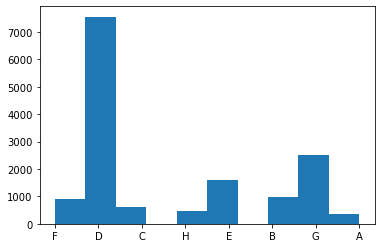

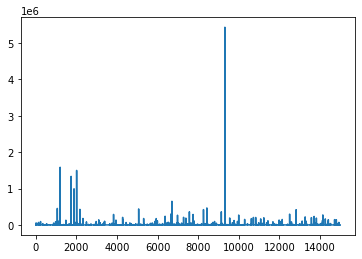

In [160]:
#visualization
plt.hist(dataset_train["category"])
plt.show()
plt.plot(dataset_train["adview"])
plt.show()


<ipython-input-161-be53ad636e8b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),


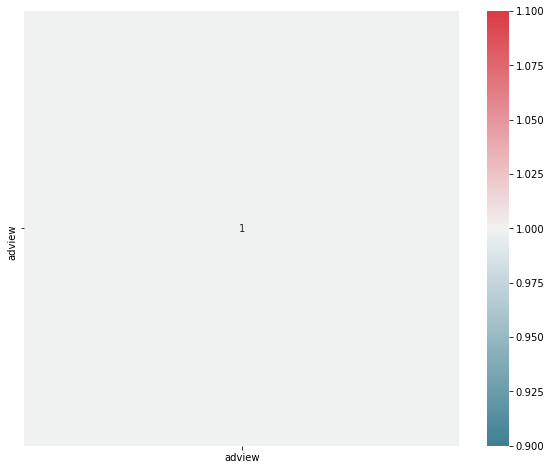

In [161]:
#heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset_train.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [162]:
#Cleaning the dataset
dataset_train = dataset_train[dataset_train.views!='F']
dataset_train = dataset_train[dataset_train.likes!='F']
dataset_train = dataset_train[dataset_train.dislikes!='F']
dataset_train = dataset_train[dataset_train.comment!='F']
dataset_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [163]:
category = {'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dataset_train["category"] = dataset_train["category"].map(category)
dataset_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [164]:
# Transform attributes into numerical values
dataset_train["views"] = pd.to_numeric(dataset_train["views"])
dataset_train["comment"] = pd.to_numeric(dataset_train["comment"])
dataset_train["likes"] = pd.to_numeric(dataset_train["likes"])
dataset_train["dislikes"] = pd.to_numeric(dataset_train["dislikes"])
dataset_train["adview"] = pd.to_numeric(dataset_train["adview"])
column_vidid = dataset_train['vidid']

In [165]:
from sklearn.preprocessing import LabelEncoder


In [166]:
dataset_train['duration'] = LabelEncoder().fit_transform(dataset_train['duration'])
dataset_train['vidid'] = LabelEncoder().fit_transform(dataset_train['vidid'])
dataset_train['published'] = LabelEncoder().fit_transform(dataset_train['published'])
dataset_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [167]:
#split dataset
y_train = pd.DataFrame(data = dataset_train.iloc[:, 1].values, columns = ['target'])
dataset_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [168]:
from sklearn.model_selection import train_test_split


In [169]:
x_train, x_test, y_train, y_test = train_test_split(dataset_train, y_train, test_size=0.2, random_state=42)

In [170]:
x_train.shape

(11709, 9)

In [171]:
x_test.shape

(2928, 9)

In [172]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler

In [173]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_cv = scaler.fit_transform(x_cv)

In [174]:
x_train.mean()

0.25439849225888495

In [175]:
#matrics
from sklearn import metrics
def print_error(x_test, y_test, model_name):
    prediction = model_name.predict(x_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))




In [ ]:
#Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
print_error(x_test,y_test, linear_regression)

In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train, y_train)
print_error(x_test,y_test, supportvector_regressor)


In [176]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
print_error(x_test,y_test, decision_tree)

Mean Absolute Error: 2435.214480874317
Mean Squared Error: 5420286145.692623
Root Mean Squared Error: 73622.5926308808


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 400
max_depth = 50
min_samples_split=30
min_samples_leaf=5
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(x_train, y_train)
print_error(x_test, y_test, random_forest)

In [177]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(13, activation="relu",
                                input_shape = x_train.shape[1:]),
                                Dense(13,activation="relu"),
                                Dense(1)
                                ])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer,loss = loss,metrics=["mean_squared_error"])
history = ann.fit(x_train,y_train,epochs = 200)
ann.summary()
print_error(x_test,y_test,ann)

Epoch 1/200
366/366 [==============================] - 1s 1ms/step - loss: 767602304.0000 - mean_squared_error: 767602304.0000
Epoch 2/200
366/366 [==============================] - 1s 1ms/step - loss: 767532224.0000 - mean_squared_error: 767532224.0000
Epoch 3/200
366/366 [==============================] - 1s 1ms/step - loss: 767356928.0000 - mean_squared_error: 767356928.0000
Epoch 4/200
366/366 [==============================] - 0s 1ms/step - loss: 767060096.0000 - mean_squared_error: 767060096.0000
Epoch 5/200
366/366 [==============================] - 0s 1ms/step - loss: 766672512.0000 - mean_squared_error: 766672512.0000
Epoch 6/200
366/366 [==============================] - 1s 1ms/step - loss: 766223488.0000 - mean_squared_error: 766223488.0000
Epoch 7/200
366/366 [==============================] - 0s 1ms/step - loss: 765787648.0000 - mean_squared_error: 765787648.0000
Epoch 8/200
366/366 [==============================] - 0s 1ms/step - loss: 765397376.0000 - mean_squared_error:

In [178]:
#Saving Scikitlearn models
import joblib
ashish = joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [ ]:
#test dataset

In [179]:
#reading test dataset
dataset_test = pd.read_csv('test.csv')
objects = ['vidid', 'views', 'likes', 'dislikes', 'comment', 'published', 'duration', 'category']
dataset_test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [180]:
dataset_test.shape

(8764, 8)

In [181]:
type(dataset_test)

pandas.core.frame.DataFrame

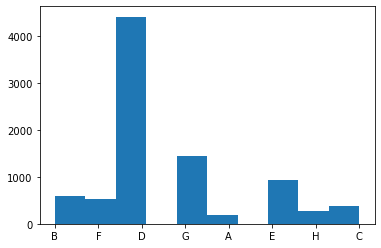

In [182]:
#visualization test dataset
plt.hist(dataset_test["category"])
plt.show()

<ipython-input-183-436f05b71d14>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),


ValueError: zero-size array to reduction operation fmin which has no identity

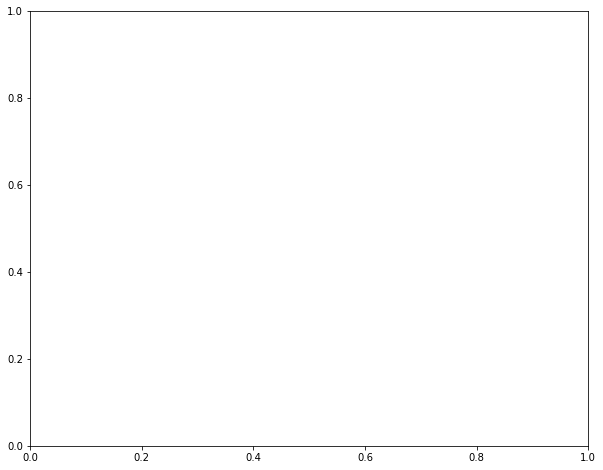

In [183]:
#heatmap test dataset
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset_test.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [184]:
#Cleaning the test dataset
dataset_test = dataset_test[dataset_test.views!='F']
dataset_test = dataset_test[dataset_test.likes!='F']
dataset_test = dataset_test[dataset_test.dislikes!='F']
dataset_test = dataset_test[dataset_test.comment!='F']
dataset_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [185]:
category = {'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dataset_test["category"] = dataset_test["category"].map(category)
dataset_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [186]:
# Transform attributes into numerical values test dataset
dataset_test["views"] = pd.to_numeric(dataset_test["views"])
dataset_test["comment"] = pd.to_numeric(dataset_test["comment"])
dataset_test["likes"] = pd.to_numeric(dataset_test["likes"])
dataset_test["dislikes"] = pd.to_numeric(dataset_test["dislikes"])
column_vidid = dataset_test['vidid']

In [187]:
dataset_test['duration'] = LabelEncoder().fit_transform(dataset_test['duration'])
dataset_test['vidid'] = LabelEncoder().fit_transform(dataset_test['vidid'])
dataset_test['published'] = LabelEncoder().fit_transform(dataset_test['published'])
dataset_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [189]:
# load the model from disk
loaded_model = joblib.load("decisiontree_youtubeadview.pkl")

In [193]:
desired_factors = ['vidid', 'views', 'likes', 'dislikes', 'comment', 'published', 'category']
train_data = dataset_train[desired_factors]
test_data = dataset_test[desired_factors]
target = dataset_train.adview


In [194]:
loaded_model.fit(train_data, target)

DecisionTreeRegressor()

In [195]:
prediction = loaded_model.predict(test_data)

In [196]:
print(prediction)

[  2.   1.   2. ...  12.   1. 687.]


In [201]:
result = pd.DataFrame(prediction)
result.index = test_data.index 
result.columns = ["Predicted Adview"]
result.to_csv("PredictedAdview.csv")